# Pandas and Matplotlib (Part2)

In [2]:
# Required packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# # from matplotlib import pyplot as plt # also possible

# only in jupyter notebooks: Embed plots inside Jupyter notebooks
%matplotlib inline

f'{pd.__version__=}, {np.__version__=}'

"pd.__version__='2.0.0', np.__version__='1.24.2'"

## 4 Statistics on Series
* Series have a number of methods for performing basic statistics
* in this lecture:
    * `[.size, .count(), .sum()]`
    * `[.mean(), .median(), .std()]`
    * `[.max(), .min(), .quantile(), .describe()]`
    * `[.head(), .tail(), .sample()]`
    * `[.value_counts(), .unique(), .duplicated()]`

### 4.1 `.size`, `.count()`, and `.sum()`
* `.size` is an attribute of the series
* `.count()` and `.sum()` depend on the *contents*

In [3]:
integers = pd.Series(np.random.randint(0, 101, 5))
integers

0    29
1    85
2    14
3    14
4    30
dtype: int64

In [4]:
integers.size

5

In [5]:
integers.count()

5

In [6]:
integers.loc[0] = np.NaN
integers

0     NaN
1    85.0
2    14.0
3    14.0
4    30.0
dtype: float64

In [7]:
integers.count(), integers.size

(4, 5)

In [8]:
integers.loc[0] = np.random.randint(0, 101, 1)
integers.sum()

179.0

In [9]:
sum(integers)

179.0

In [10]:
help(pd.Series.sum)

Help on function sum in module pandas.core.generic:

sum(self, axis: 'Axis | None' = None, skipna: 'bool_t' = True, numeric_only: 'bool_t' = False, min_count: 'int' = 0, **kwargs)
    Return the sum of the values over the requested axis.
    
    This is equivalent to the method ``numpy.sum``.
    
    Parameters
    ----------
    axis : {index (0)}
        Axis for the function to be applied on.
        For `Series` this parameter is unused and defaults to 0.
    
        For DataFrames, specifying ``axis=None`` will apply the aggregation
        across both axes.
    
        .. versionadded:: 2.0.0
    
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    numeric_only : bool, default False
        Include only float, int, boolean columns. Not implemented for Series.
    
    min_count : int, default 0
        The required number of valid values to perform the operation. If fewer than
        ``min_count`` non-NA values are present the result

### 4.2 `.mean()`, `.median()`, `.std()`
* Series provide methods for simple statistics
    * arithmetic `mean` $\mu$ (average value of numeric Series)
    * `median` value (half of the values are above, half are below)
    * standard deviation $\sigma$ (measure of the "spread")
        * with *degrees of freedom* $\Delta_\text{dof}$: default 1, **differing from [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)** (where `ddof=0` by default)
        * pass `ddof=0` for the "uncorrected" standard deviation
    $$\mu = \frac{1}{N} \sum_{i=1}^N s_i~~~~~~~~;~~~~~~~~\sigma = \sqrt{\frac{1}{N-\Delta_{\text{dof}}} \sum_{i=1}^N (s_i - \mu)^2}$$

In [11]:
int_range = pd.Series(np.arange(0, 101, 1))
int_range

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Length: 101, dtype: int64

In [12]:
f'{int_range.mean()=}, {int_range.median()=}, {int_range.std()=}'

'int_range.mean()=50.0, int_range.median()=50.0, int_range.std()=29.300170647967224'

In [13]:
# The mean is the sum divided by the size
f'mean = {int_range.sum() / int_range.count()};   {int_range.mean() = }'

'mean = 50.0;   int_range.mean() = 50.0'

In [14]:
# The median is the "halfway point" of the sorted values
int_range.loc[100] = 1000000
int_range.mean(), int_range.median()

(9950.0, 50.0)

In [15]:
# The Standard Deviation is tricky!
# By default, Pandas uses the "sample standard deviation"
pd.Series((0)).std(), pd.Series((0, 0)).std(), pd.Series((0, 2)).std()

(nan, 0.0, 1.4142135623730951)

In [16]:
# If we want the uncorrected ("numpy") standard deviation, we have to pass ddof=0
pd.Series((0)).std(ddof=0), pd.Series((0, 0)).std(ddof=0), pd.Series((0, 2)).std(ddof=0)

(0.0, 0.0, 1.0)

In [17]:
help(pd.Series.std)

Help on function std in module pandas.core.generic:

std(self, axis: 'Axis | None' = None, skipna: 'bool_t' = True, ddof: 'int' = 1, numeric_only: 'bool_t' = False, **kwargs)
    Return sample standard deviation over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument.
    
    Parameters
    ----------
    axis : {index (0)}
        For `Series` this parameter is unused and defaults to 0.
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default False
        Include only float, int, boolean columns. Not implemented for Series.
    
    Returns
    -------
    scalar or Series (if level specified) 
    
    Notes
    -----
    To have the same behaviour as `numpy.std`, use `ddof=0` (in

### 4.3 `.max()`, `.min()`, `.quantile()`, `.describe()`
* `.max()`, `.min()` retrieve the maximum and minimum numeric elements
* `.quantile(q=0.5: float)` returns the value at a given quantile (in $[0, 1]$)
    * a proportion of $q$ (and $1-q$, respectively) of series values is below (above) the result
    * minimum, maximum values at q = 0, 1
* `.describe()` gives summarizing statistics
    * count and type of values
    * mean and std
    * min, max
    * median and 1st, 3rd quartiles


In [18]:
int_range

0            0
1            1
2            2
3            3
4            4
        ...   
96          96
97          97
98          98
99          99
100    1000000
Length: 101, dtype: int64

In [19]:
int_range.min(), int_range.max()

(0, 1000000)

In [20]:
int_range.describe()

count        101.000000
mean        9950.000000
std        99498.797774
min            0.000000
25%           25.000000
50%           50.000000
75%           75.000000
max      1000000.000000
dtype: float64

In [21]:
points = pd.Series((0, 10, 20, 30, 40, 50))
points.quantile(0.6)

30.0

In [22]:
points.quantile(0.5)

25.0

In [23]:
help(pd.Series.quantile)

Help on function quantile in module pandas.core.series:

quantile(self, q: 'float | Sequence[float] | AnyArrayLike' = 0.5, interpolation: 'QuantileInterpolation' = 'linear') -> 'float | Series'
    Return value at the given quantile.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        The quantile(s) to compute, which can lie in range: 0 <= q <= 1.
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        This optional parameter specifies the interpolation method to use,
        when the desired quantile lies between two data points `i` and `j`:
    
            * linear: `i + (j - i) * fraction`, where `fraction` is the
              fractional part of the index surrounded by `i` and `j`.
            * lower: `i`.
            * higher: `j`.
            * nearest: `i` or `j` whichever is nearest.
            * midpoint: (`i` + `j`) / 2.
    
    Returns
    -------
    float or Series
        If ``q`` is an array, a 

### 4.4 `.head()`, `.tail()`, `.sample(n)`
* To preview a series, it's often helpful to look at the first and last few values
    * do I have the correct data?
    * was the series read in or processed correctly?
    * have headers and footers been removed?
* don't use this to draw a sample from your data!

In [24]:
int_range.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [25]:
int_range.tail(2)

99          99
100    1000000
dtype: int64

In [26]:
int_range.sample(4)

93          93
100    1000000
76          76
11          11
dtype: int64

### 4.5 `.value_counts()`, `.unique()`, `.duplicated()`
* These methods are useful with *non-numeric* data
    * e.g. a corpus of words
* `.value_counts` returns a series with the frequency of values in a Series

In [27]:
words = pd.Series('In Ulm und um Ulm und um Ulm herum'.split())
words

0       In
1      Ulm
2      und
3       um
4      Ulm
5      und
6       um
7      Ulm
8    herum
dtype: object

In [28]:
words.describe()

count       9
unique      5
top       Ulm
freq        3
dtype: object

In [29]:
words.value_counts(normalize=True, ascending=True)

In       0.111111
herum    0.111111
und      0.222222
um       0.222222
Ulm      0.333333
Name: proportion, dtype: float64

In [30]:
words.value_counts()[words.value_counts() == 2]

und    2
um     2
Name: count, dtype: int64

In [31]:
words.value_counts()[words.value_counts() > 1]

Ulm    3
und    2
um     2
Name: count, dtype: int64

In [32]:
words.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
8    False
dtype: bool

In [33]:
words[~words.duplicated()]

0       In
1      Ulm
2      und
3       um
8    herum
dtype: object

In [34]:
words[~words.duplicated()].values

array(['In', 'Ulm', 'und', 'um', 'herum'], dtype=object)

In [35]:
words.unique()  # watch out: numpy array!

array(['In', 'Ulm', 'und', 'um', 'herum'], dtype=object)

### 4.6 Plots for statistical insight
* *histograms* visualize the distribution of points, separated into bins
    * displays distribution of one-dimensional data points
    * quick diagnostic tool: range of values, most common value
* *box plots* display the most important statistical parameters of a series
    * median, quartiles, range of values, and outliers
    * useful e.g. to compare across measurements

* may be applied even in scatterplots: show *marginal* distribution of data

In [36]:
number_of_samples = 100
normal_sample = pd.Series(np.random.randn(number_of_samples))
normal_sample.describe()

count    100.000000
mean      -0.060393
std        0.963975
min       -2.676331
25%       -0.636949
50%        0.007972
75%        0.634475
max        1.918595
dtype: float64

<Axes: title={'center': 'random sample of the normal distribution'}, ylabel='Frequency'>

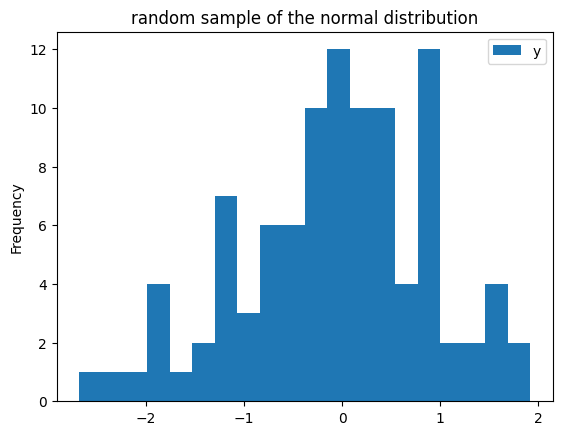

In [37]:
normal_sample.plot.hist(
    title='random sample of the normal distribution',
    bins=20,
    density=False,
    label='y',
    legend=True,
)

In [38]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution either as a
    `.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
    *weights* parameters are forwarded to `numpy.histogram`.
    
    If the data has already been binned and counted, use `~.bar` or
    `~.stairs` to plot the distribution::
    
        counts, bins = np.histogram(x)
        plt.stairs(counts, bins)
    
    Alternatively, plot pre-computed bins and counts using ``hist()`` by
    treating each bin as a single point with a weight equal to its count::
    
        plt.hist(bins[:-1], bins, weights=coun

<Axes: title={'center': 'random sample of the normal distribution'}, ylabel='(y - μ) / σ'>

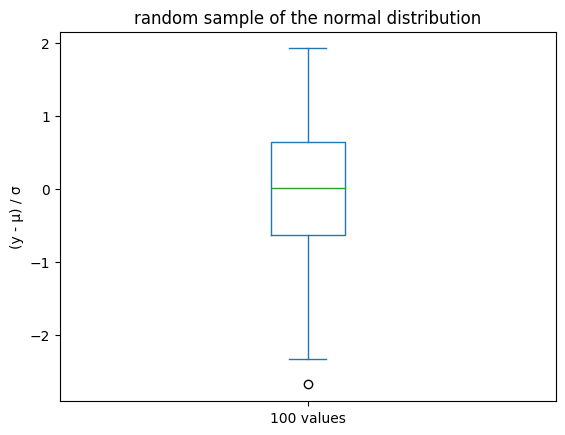

In [39]:
normal_sample.plot.box(
    legend=True,
    title='random sample of the normal distribution',
    ylabel='(y - μ) / σ',
    label=f'{number_of_samples} values',
)

In [40]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|    

### 4.7 Tasks

##### 1. Standardabweichung
Berechnen Sie die Standardabweichung der `Series((0, 2))` einmal von Hand, einmal mit numpy, und einmal mit Pandas. Was stellen Sie fest? Was müssen Sie tun, um konsistente Ergebnisse zu erhalten?

The standard deviation of a set of values $\{x_i\}_{i = 1,\dots, N}$ is computed as follows:
$$
\sigma = \sqrt{\frac{1}{N - \Delta_\mathrm{ddof}}\sum_{i = 1}^N (x_i - \mu)^2},
$$
where $\mu$ is the mean value:
$$
\mu = \frac{1}{N}\sum_{i=1}^N x_i
$$

In [57]:
serie = pd.Series((0,2))
print(f"{serie.std()=}")
print(f"{serie.std(ddof=0)=}")
print(f"{np.std(serie)=}")

serie.std()=1.4142135623730951
serie.std(ddof=0)=1.0
np.std(serie)=1.0


##### 2. Eckpunkte einer Series
Erzeugen Sie sich eine Series mit 400 zufälligen Integern zwischen 0 und 100.
* Verschaffen Sie sich zunächst einen Überblick mit der `.describe`-Methode.
* Welches sind die häufigsten Werte? Welche Werte tauchen am seltensten auf?
* Wie oft tauchen die "vollen 10'er" auf, also 0, 10, 20,...?
* Gibt es Werte zwischen 0 und 100, die gar nicht auftauchen? Wenn ja, welche?

In [74]:
random = pd.Series(np.random.randint(0, 101, 400))
print(random.describe())
print("Nicht vorhandene Werte: ", random.value_counts()[random.value_counts() < 1])

count    400.000000
mean      48.567500
std       28.818774
min        0.000000
25%       22.000000
50%       48.000000
75%       73.000000
max      100.000000
dtype: float64
Nicht vorhandene Werte:  Series([], Name: count, dtype: int64)


## 5 Data types and Missing Values

### 5.1 Series data types
* internally, Series (and indices) use numpy datatypes
* important implications for "big data":
    * storage requirement differs widely
    * overflow, precision
* at creation, pandas determines a "fitting" dtype
    * only numeric types or "object"
* Series are "flexible"
    * assignment can change the Series data type
    * easy typecasting with `.astype`

In [41]:
integers = pd.Series([20, 30, 40])
integers

0    20
1    30
2    40
dtype: int64

In [42]:
integers.dtype

dtype('int64')

In [43]:
integers = pd.Series([20, 30, 40], dtype=np.int32)
integers

0    20
1    30
2    40
dtype: int32

In [44]:
integers = integers.astype(np.int8)
integers

0    20
1    30
2    40
dtype: int8

In [45]:
integers * 4

0     80
1    120
2    -96
dtype: int8

In [46]:
floats = pd.Series([4, 5, 6], dtype=np.float64)
floats, floats.values

(0    4.0
 1    5.0
 2    6.0
 dtype: float64,
 array([4., 5., 6.]))

In [47]:
objects = pd.Series('using a string yields dtype "object"'.split())
objects

0       using
1           a
2      string
3      yields
4       dtype
5    "object"
dtype: object

In [48]:
integers

0    20
1    30
2    40
dtype: int8

In [49]:
integers.loc[0] = 1.23  # Careful: Assignment with `.loc` changes Series type!
integers

0     1.23
1    30.00
2    40.00
dtype: float64

In [50]:
integers.loc[3] = '56'
integers

0    1.23
1    30.0
2    40.0
3      56
dtype: object

In [51]:
integers.sum()  # Python can not add "str" and "float"

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
integers = integers.astype(np.float32)
integers

In [ ]:
integers.sum()

In [ ]:
integers.astype(np.int8)

In [ ]:
strings = pd.Series('12 34 56 78'.split())
strings.sum()
strings

In [ ]:
strings.mean()

In [ ]:
strings = strings.astype(np.int64)  # need to assign back. Not in-place!
strings.mean()

In [ ]:
boolean_mask = integers < 50
boolean_mask

In [ ]:
pd.Series(
    ['big', 'small', 'big', 'big', 'big', 'small', 'big', 'small', 'small'],
    dtype='category',
)

In [ ]:
from datetime import datetime, timedelta

dates = pd.Series([datetime.fromisoformat(f'2021-04-{day:02}') for day in range(1, 31)])
times = pd.Series([timedelta(hours=day) for day in range(0, 30)])
dates.head(), times.head()

In [ ]:
(dates + times).head()

### 5.2 Missing Values
* `np.nan` is a special `np.float`
* designates missing or undefined data
    * "no response" in survey data
    * result of certain invalid operations (e.g. `0 / 0`)
* pandas provides functions and parameters for skipping `NaN` values


* Experimental: pandas provides its own "missing value": `pd.NA`
    * can be used as integer

In [ ]:
np.nan, pd.NA

In [ ]:
miss = pd.Series([1, 2, np.nan, 4, 5])  # , dtype='Int64')
miss

In [ ]:
miss.size, miss.count()

In [ ]:
type(np.nan)

In [ ]:
np.nan + 10

In [ ]:
np.nan == np.nan

In [ ]:
np.nan is np.nan

#### 5.2.1 Dealing with NaN
* numpy typically does *not* deal with nan itself
* pandas often tried to accommodate missing data as best it can
    * treated as 0, and does not add to count
* different methods are applicable in different situations:
    * `dropna` removes missing values
    * `fillna`, `interpolate` fill in missing values
    * `fill_value` prevents creation of missing values

In [ ]:
miss.values.sum()  # this sums the numpy array

In [ ]:
miss.sum()  # this skips na by default!

In [ ]:
help(pd.Series.sum)

In [ ]:
many_missing_values = pd.Series(
    [-15, np.nan, 4, 9, np.nan, 1, -10, -12, np.nan, np.nan, 3, 13, 25, np.nan]
)
many_missing_values

In [ ]:
many_missing_values.dropna()  # This gets rid of `nan` values

In [ ]:
many_missing_values.fillna(many_missing_values.mean())

####  5.2.2 fill_value
* numeric operations have optional parameter `fill_value`
* prevents creation of `nan` values when index is not available
* which value is appropriate depends on the operation and context

In [ ]:
revenue = pd.Series([1, 2, 3, 4, 5], index=[2017, 2018, 2019, 2020, 2021])
expenses = pd.Series([2, 3, 3, 1], index=[2017, 2018, 2019, 2020])
revenue - expenses  # value for 2021 is missing!

In [ ]:
revenue.sub(expenses, fill_value=0)

#### 5.2.3 interpolate
* pandas can interpolate missing values
* various methods available
    * linear, splines, for smooth plotting, time-sensitive
* warning: this "invents" data

In [ ]:
many_missing_values.interpolate(method='akima').plot.line(label='akima', legend=True)
many_missing_values.interpolate(method='linear').plot.line(label='linear', legend=True)
many_missing_values.interpolate(method='spline', order=3).plot.line(
    label='spline', legend=True
)

many_missing_values.plot.line(style='o', legend=True, label='measured')

### 5.3 Tasks

##### 1. Auftreten bei Operationen
Erzeugen Sie drei Series mit normalverteilten Zufallszahlen:
* Eine Series mit 4 Werten und den Indizes 'abcd',
* eine Series mit 5 Werten und den Indizes 'abcde', und
* eine Series mit 6 Werten und den Indizes 'abcabc'.

Multiplizieren und addieren Sie die Series jeweils paarweise.
* Wie können Sie jeweils sinnvollerweise mit `nan`-Werten umgehen oder diese vermeiden?
* Welchen Einfluss haben diese Vorgehensweisen auf Mittelwert und Standardabweichung?

##### 2. `size` und Imputieren fehlender Werte
Erzeugen Sie eine `Series` mit 1000 zufälligen `float`s zwischen 0 und 1000.
* Ersetzen Sie alle Werte < 100 und alle Werte > 900 mit `np.nan`.
    * Was ist die Summe, die Standardabweichung, und der Mittelwert der Series?
    * Was ist ihre `size`, und wie viele Werte verbleiben?
* Ersetzen Sie alle nun fehlenden Werte mit dem Mittelwert der verbleibenden Werte.
    * Wie ändern sich dadurch Summe, Mittelwert, und Standardabweichung?

## 6 Transformations
* Series values and indices are mutable
    * can easily be re-assigned
    * typical operations still create new instances
    * `inplace=True` is deprecated

* more comprehensive transformations need dedicated methods
    * replace
        * `Series.replace` *ignores* values not found
        * `Series.map` *drops* values not found
        
    * condense
        * `Series.cumsum` adds progressively
        * `Series.aggregate` (or `Series.agg`) returns a scalar value
        
    * sort
        * `Series.sort_values` sorts by series *values*
        * `Series.sort_index` sort by series *index*
    
    * manipulate
        * `Series.apply` uses a single function
        * `Series.transform` uses one or more functions, "string functions", or dicts

### 6.1 Replace and map
* Replace values with different values according to a replacement rule
* for the difference, see also https://stackoverflow.com/a/62947436

#### `Series.replace`
- can utilize strings or regular expressions
- may give two positional arguments: replace first with second
- may also give a mapping (dict or Series)
- all values not explicitly given are ignored

In [ ]:
help(pd.Series.replace)

In [ ]:
strings = pd.Series('Er sah das Wasser as'.split())
strings

In [ ]:
strings.replace('as', 'an')

In [ ]:
strings.replace('^.s$', 'an', regex=True)  # with a regular expression

In [ ]:
integers = pd.Series((0, 10, 20, 30))
integers.replace(0, 1000)  # with two values

In [ ]:
integers.replace({10: 100, 20: 200, 50: 10})  # with a dict

In [ ]:
replacement = pd.Series(data=(5, 6, 7), index=(0, 10, 20))
print(integers,replacement)
integers.replace(replacement)  # with a Series

#### `Series.map`
- accepts a Series, dict, or function
    - `Series` with old values in the index
    - `dict` with old values: new values as key-value pairs
    - function with a single argument: similar to `apply` (see below)
- if a value is not found, replace with `na`

In [ ]:
help(pd.Series.map)

In [ ]:
integers

In [ ]:
replacement

In [ ]:
integers.map(replacement)

In [ ]:
integers.map({10: 100, 20: 200, 50: 10})

### 6.2 Condense
- `Series.cumsum` cumulates values
- `Series.mean`, `Series.std` for statistics
- `Series.all`, `Series.any` for truthiness
- `Series.agg` with arbitrary functions

#### `Series.cumsum`
- adds up all values
- sometimes useful in statistics
- returns a Series of the sum up to each index

In [ ]:
help(pd.Series.cumsum)

In [ ]:
errors = pd.Series(
    (1, 1, 0, 0, 2, 2, 1), index=pd.date_range(start='2021-04-01', periods=7)
)
errors

In [ ]:
errors.cumsum()

#### `Series.aggregate`
* applies a function to a Series
    * returns a single value
* applies a *list of* functions
    * returns a *Series of* values

In [ ]:
integers.agg('max')

In [ ]:
integers.agg('std', ddof=1)

In [ ]:
random_normal = pd.Series(1.87 * np.random.randn(1000))
random_normal.agg(['product', 'sum'])

In [ ]:
random_normal.agg(
    [
        pd.Series.count,
        pd.Series.mean,
        pd.Series.std,
        pd.Series.min,
        pd.Series.max,
        pd.Series.quantile,
        pd.Series.quantile,
    ],
    q=0.25,
)

* note: relatively trivial when applied to Series
* more interesting with DataFrames
    * precise control over axis of aggregation
    * different methods for different columns, at once

In [ ]:
help(pd.Series.agg)

### 6.3 Sort
* a very basic way to manipulate data
* small values first, big values later
    * may pass custom key to sort data by
* may introduce bias and destroy information
    * order of items may convey "hidden" information
    * instead, we suggest a new order which was never there
* sorting the underlying numpy arrays is faster

In [ ]:
help(pd.Series.sort_values)

#### `Series.sort_values`
- returns a new Series, sorted by value
    - sorting order depends on datatype
- may sort in `ascending` order (or not)
- may `ignore_index` to create a new numeric index
- may sort missing values first or last

In [ ]:
pd.Series((100, 11, 1)).sort_values()

In [ ]:
pd.Series(('100', '11', '1')).sort_values()

In [ ]:
pd.Series(('100', '11', '1')).sort_values(ignore_index=True)

In [ ]:
random_normal.sort_values(na_position='first')

In [ ]:
random_normal.sort_values(ascending=False)

In [ ]:
%%timeit
np.random.seed(1)
values = pd.Series(np.random.randn(10_000_000)).sort_values()

In [ ]:
%%timeit
np.random.seed(1)
values = np.random.randn(10_000_000)
values.sort()

#### `Series.sort_index`
- we may also sort by index
- when Series have more than one index, sort sequentially
    - may give indices to sort first by
    - may ignore other indices

In [ ]:
random_normal.sort_index()

In [ ]:
help(pd.Series.sort_index)

#### sort functions
- so far only sorted "from small to big" and "from big to small"
- arbitrary functions can be given as "key" to sort by
- series are then sorted by function output

In [ ]:
def sort_function(s: int) -> int:
    return np.sin(abs(s))

In [ ]:
random_normal.sort_values(key=sort_function)

### 6.4 Apply and Transform
- invoke a function on the values
    - operates on *one row at a time*
    - may provide additional keyword args
- for the difference, see https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705

In [ ]:
help(pd.Series.apply)

In [ ]:
help(pd.Series.transform)

#### `Series.transform`
(single Series $\rightarrow$ multiple results)
- may use a (numpy or python) function, a 'string function', a list of functions, or a dict
- cannot use to aggregate Series (result has same length as input)
- may only use a single Series at a time

In [ ]:
integers = pd.Series((10, 20, 30))

In [ ]:
integers.transform(np.exp)  # numpy ufunc

In [ ]:
def loglin(x, base=np.e):
    return x * np.log(x) / np.log(base)


integers.transform(loglin, base=10)  # Python function

In [ ]:
integers.transform('sqrt')  # "string function": Pandas looks these up

In [ ]:
integers.transform(['sqrt', np.square, loglin])  # output is a `pd.DataFrame`!

#### `Series.apply`
(multiple Series $\rightarrow$ single result)
- may *only* use a numpy ufunc, string function, or a Python function (no list or dict!)
- may use multiple Series (of a DataFrame) at a time
- may produce aggregated results
- may automatically convert the data type

In [ ]:
integers.apply(np.sqrt)  # `Series` result

In [ ]:
integers.apply('prod')  # scalar result, does not work with Series.transform

In [ ]:
integers.apply(loglin, base=10, convert_dtype=False)

In [ ]:
transformed_ints = integers.transform(['sqrt', np.square, loglin])
transformed_ints

In [ ]:
transformed_ints.apply('sum')  # returns a Series

In [ ]:
transformed_ints.apply('sum', axis=1)

In [ ]:
transformed_ints

In [ ]:
def weigh_by_index(x: pd.DataFrame) -> pd.Series:
    return x.values * x.index


transformed_ints.apply(weigh_by_index, axis=0)

In [ ]:
def my_condensation(x: pd.DataFrame) -> pd.Series:
    return x['sqrt'] + (x['square'] * x['loglin'])


transformed_ints.apply(my_condensation, axis=1)

In [ ]:
transformed_ints.transform(my_condensation, axis=1)

### 6.5 Tasks

Betrachten Sie die `Series` namens `ints` mit einem manuell gesetzten Index und zufällig gewählten Werten.

In [ ]:
np.random.seed(1)
ints = pd.Series(np.random.randint(0, 10, 10), index=range(0, 20, 2))
ints

##### 1. `replace`, `map`, und `aggregate`
- `replace`, `map`
    - Was erhalten Sie mit `ints.replace(ints)`? Warum erhalten Sie viele ungerade Werte?
    - Was erhalten Sie mit `ints.map(ints)`? Warum hat das Ergebnis fehlende Werte?
- aggregate
    - Schreiben Sie Funktionen `sum_odd` und `sum_even`, welche die ungeraden bzw. geraden Werte einer Series addiert. Nutzen Sie `Series.aggregate`, um sich eine neue Series mit der Summe der ungeraden Werte, der geraden Werte, und aller Werte zu erstellen.

##### 2. `sort`, `apply`, und `transform`
- `sort`
    - Sortieren Sie die Werte. Wie unterscheiden sich `kind='heapsort'` und `kind='quicksort'`?
- `apply`, `transform`
  - Wenden Sie (mit `Series.apply`) die Funktionen `np.log`, `np.exp`, `'sqrt'`, und `'square'` auf die Werte an, sodass Sie einen `DataFrame` erhalten.
  - Wenden Sie auf diesen `DataFrame` die Funktion `'sum'` so an, dass Sie eine Series mit dem gleichen Index, aber als Werte die Summe aller Spalten erhalten.
  - wie können Sie mit `Series.transform` das gleiche Endergebnis erhalten?

## 7 Conclusion: Pandas Series
- `Series` are a powerful class for one-dimensional data
    - numpy arrays with generalized indexing capabilities
    - a plenitude of methods are available
        * easily construct, plot, and transform data
        * do simple statistics and deal with missing values
        * much more than shown here — read the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)


- `Series` cannot deal well with multi-dimensional data
    - scatterplots are a pain
    - we need to (ab-)use the index
    - we cannot hold all our data (e.g. measurements) in one object


- up one level: `DataFrame`s!